# Synthetic Dataset Project
## By Group 8: |  Clores, Mark Angelo  |  Parañal, Rachel  |  Janda, Christian  |
---
---
### Option 1: Synthetic Data Modeling (General Application)
#### Notif: If there is already a dataset in the folder "Dataset", Skip P1 Dataset Generator to P2 EDA and run from there.
---

## P1. Dataset Generator

### Imports

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

### Parameters for each class

In [42]:
params = {
    "LowRisk": {
        "income": (85000, 15000),
        "age": (44, 10),
        "credit_score": (760, 30),
        "debt_ratio": (0.22, 0.10),
        "loan_amount": (12000, 5000)
    },
    "MediumRisk": {
        "income": (55000, 12000),
        "age": (37, 12),
        "credit_score": (660, 40),
        "debt_ratio": (0.38, 0.15),
        "loan_amount": (18000, 7000)
    },
    "HighRisk": {
        "income": (32000, 8000),
        "age": (30, 8),
        "credit_score": (550, 50),
        "debt_ratio": (0.58, 0.20),
        "loan_amount": (25000, 10000)
    }
}

### Sample size per class

In [43]:
samples_per_class = 3500   # Total = 15000 samples

### Function to generate data for one class

In [44]:
def generate_class_data(class_name, params, n_samples):
    """Generate synthetic samples for a given risk class."""
    cls_params = params[class_name]

    data = {
        "income": np.random.normal(cls_params["income"][0], cls_params["income"][1], n_samples),
        "age": np.random.normal(cls_params["age"][0], cls_params["age"][1], n_samples),
        "credit_score": np.random.normal(cls_params["credit_score"][0], cls_params["credit_score"][1], n_samples),
        "debt_ratio": np.random.normal(cls_params["debt_ratio"][0], cls_params["debt_ratio"][1], n_samples),
        "loan_amount": np.random.normal(cls_params["loan_amount"][0], cls_params["loan_amount"][1], n_samples),
        "risk_class": [class_name] * n_samples
    }
    return pd.DataFrame(data)

### Append all classes in dataframe list

In [45]:
df_list = []

for cls in params.keys():
    df_list.append(generate_class_data(cls, params, samples_per_class))

df = pd.concat(df_list, ignore_index=True)

##### Print the dataframe to monitor successful appending of classes

In [46]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (10500, 6)


income        age  credit_score  debt_ratio   loan_amount risk_class
0   76746.482663  67.070209    724.889118    0.301259  12630.199799    LowRisk
1   92731.496087  42.212249    766.102965    0.109368   1614.357224    LowRisk
2   92107.912506  50.766479    772.282615    0.238465  11305.437453    LowRisk
3  105526.751849  58.444875    747.213407    0.085868   6628.127286    LowRisk
4   71247.597343  37.953379    762.852143    0.216310  10240.896017    LowRisk

### Save to out.csv inside Dataset folder

In [47]:
folder_name = "Dataset"
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    print(f"Folder '{folder_name}' created.")
else:
    print(f"Folder '{folder_name}' already exists.")

# Source - https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
# Posted by Andy Hayden, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-11, License - CC BY-SA 4.0

df.to_csv("Dataset\out.csv", encoding='utf-8', index=False, header=True)

Folder 'Dataset' already exists.


---
---
## P2. Exploratory Data Analysis (EDA)

### Imports

In [48]:
import matplotlib.pyplot as plt
import numpy as np                              # In case user starts here
import pandas as pd
import seaborn as sns
import plotly.express as px

### !! Load Synthetic Dataset !!
- to avoid overwriting and recreating everytime, and load the dataset premade before

In [49]:
df = pd.read_csv('Dataset\out.csv')

### Inspect current Data

In [50]:
print("Dataset Overview:\n", df.head())
print("\nSummary Statistics:\n", df.describe())
print("\nClass Distribution:\n", df['risk_class'].value_counts())

Dataset Overview:
           income        age  credit_score  debt_ratio   loan_amount risk_class
0   76746.482663  67.070209    724.889118    0.301259  12630.199799    LowRisk
1   92731.496087  42.212249    766.102965    0.109368   1614.357224    LowRisk
2   92107.912506  50.766479    772.282615    0.238465  11305.437453    LowRisk
3  105526.751849  58.444875    747.213407    0.085868   6628.127286    LowRisk
4   71247.597343  37.953379    762.852143    0.216310  10240.896017    LowRisk

Summary Statistics:
               income           age  credit_score    debt_ratio   loan_amount
count   10500.000000  10500.000000  10500.000000  10500.000000  10500.000000
mean    57561.807134     37.078208    657.233033      0.392954  18202.749909
std     24918.189340     11.682171     94.114971      0.213315   9211.563320
min       307.363456     -7.262411    376.554179     -0.162691 -11043.959272
25%     36102.760457     28.859483    581.706037      0.231505  11601.376043
50%     54381.339383   

### Distribution of each features

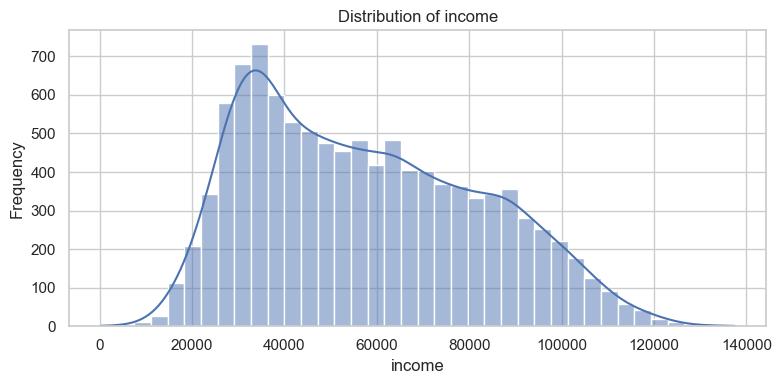

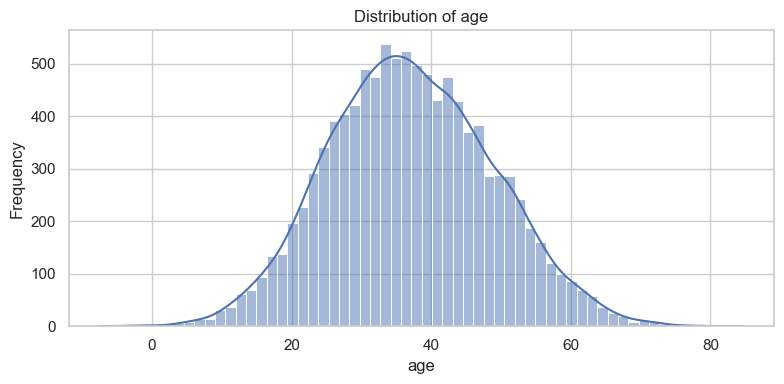

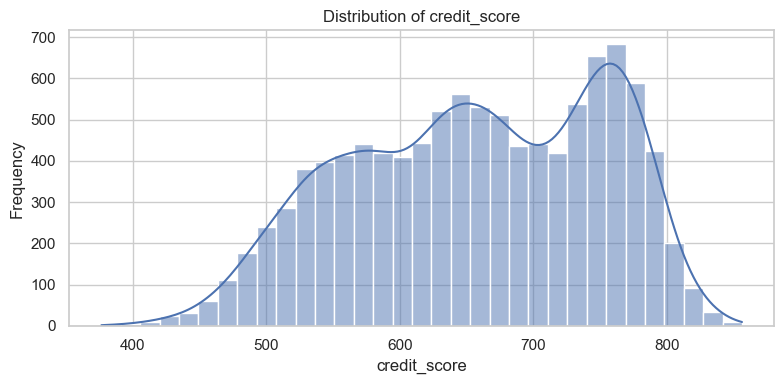

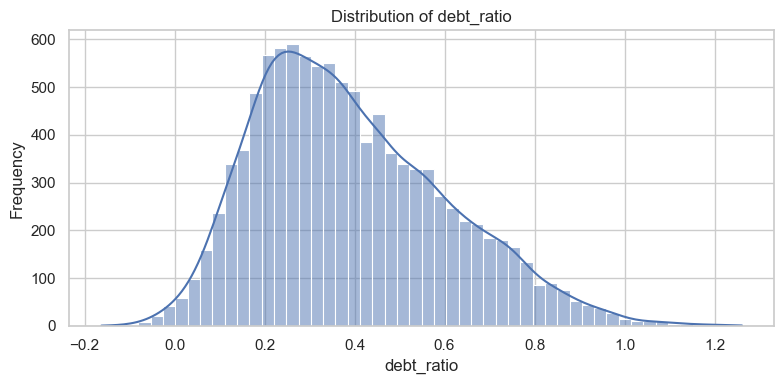

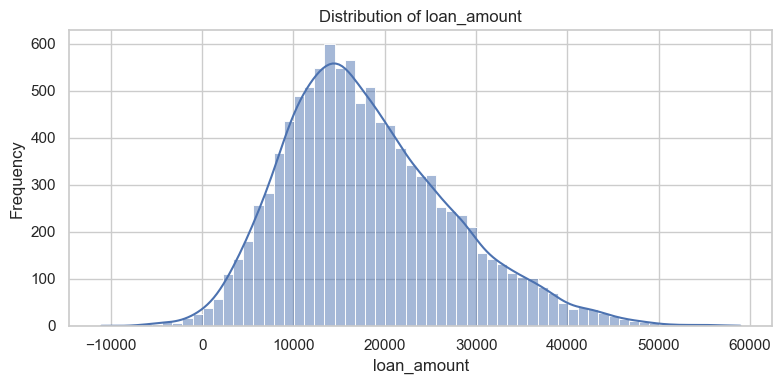

In [51]:
numeric_features = ['income', 'age', 'credit_score', 'debt_ratio', 'loan_amount']

for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### Boxplots

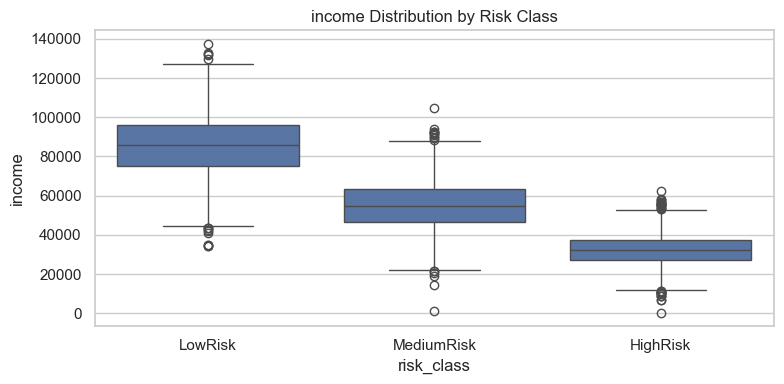

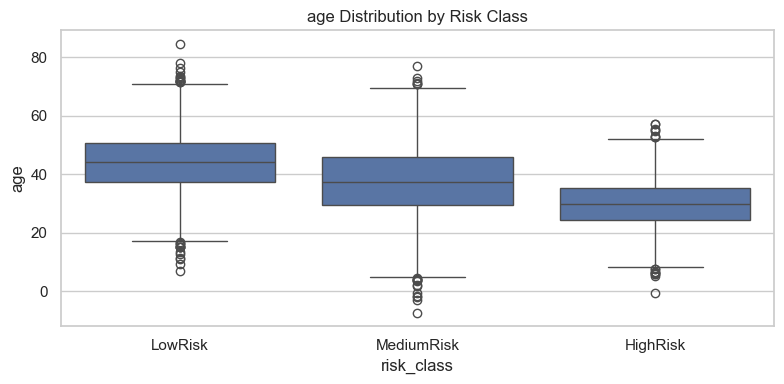

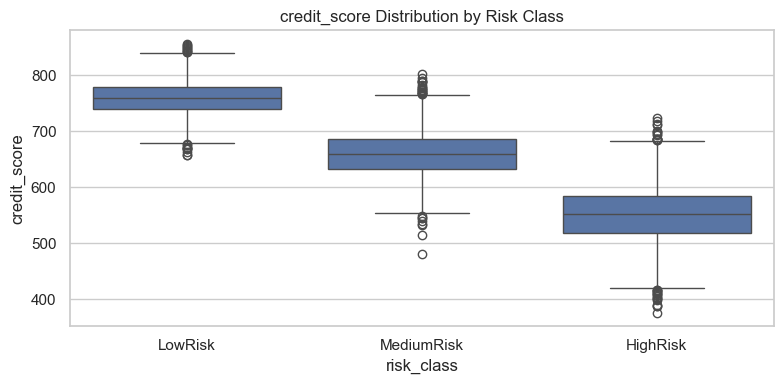

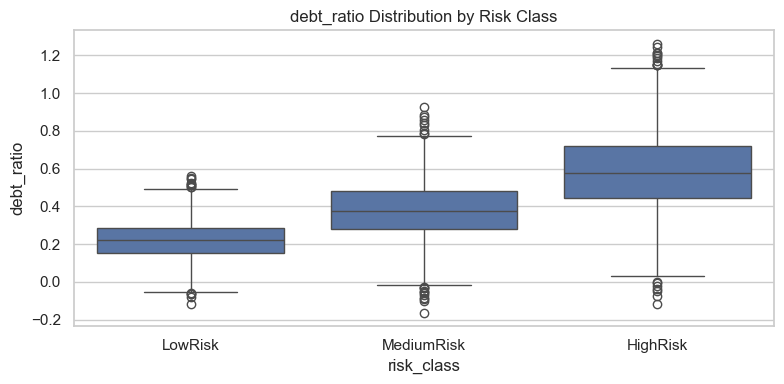

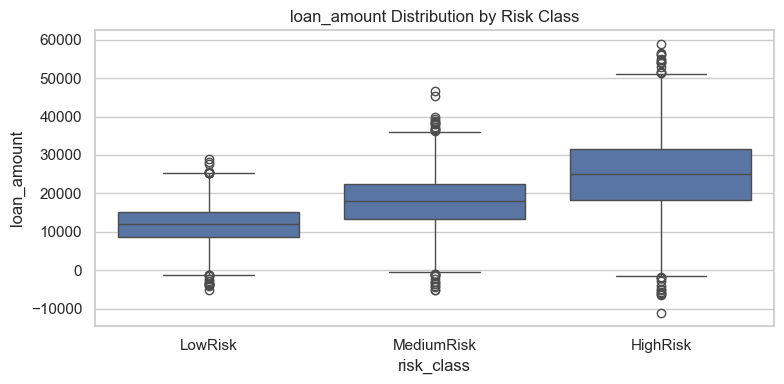

In [52]:
for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='risk_class', y=col, data=df)
    plt.title(f"{col} Distribution by Risk Class")
    plt.tight_layout()
    plt.show()

### Heatmap or Correlation Plot

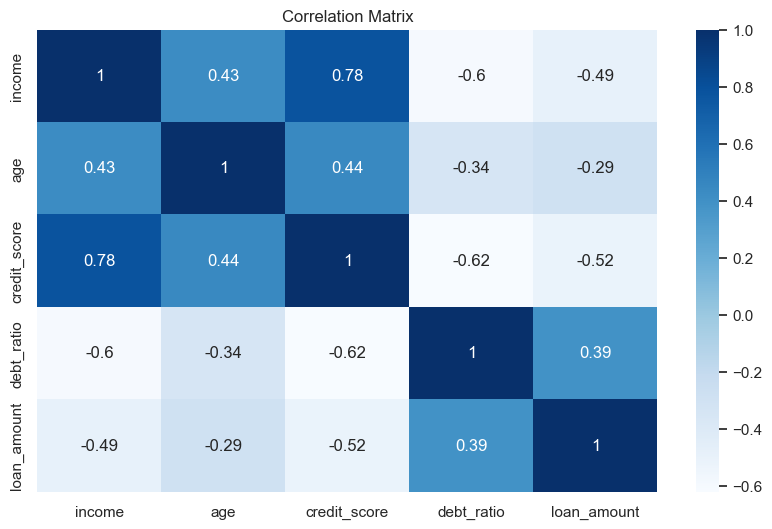

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

### Interactive Heatmap

In [54]:
corr=df[numeric_features].corr()
fig=px.imshow(corr, text_auto=True)
fig.show()

### Pairplot

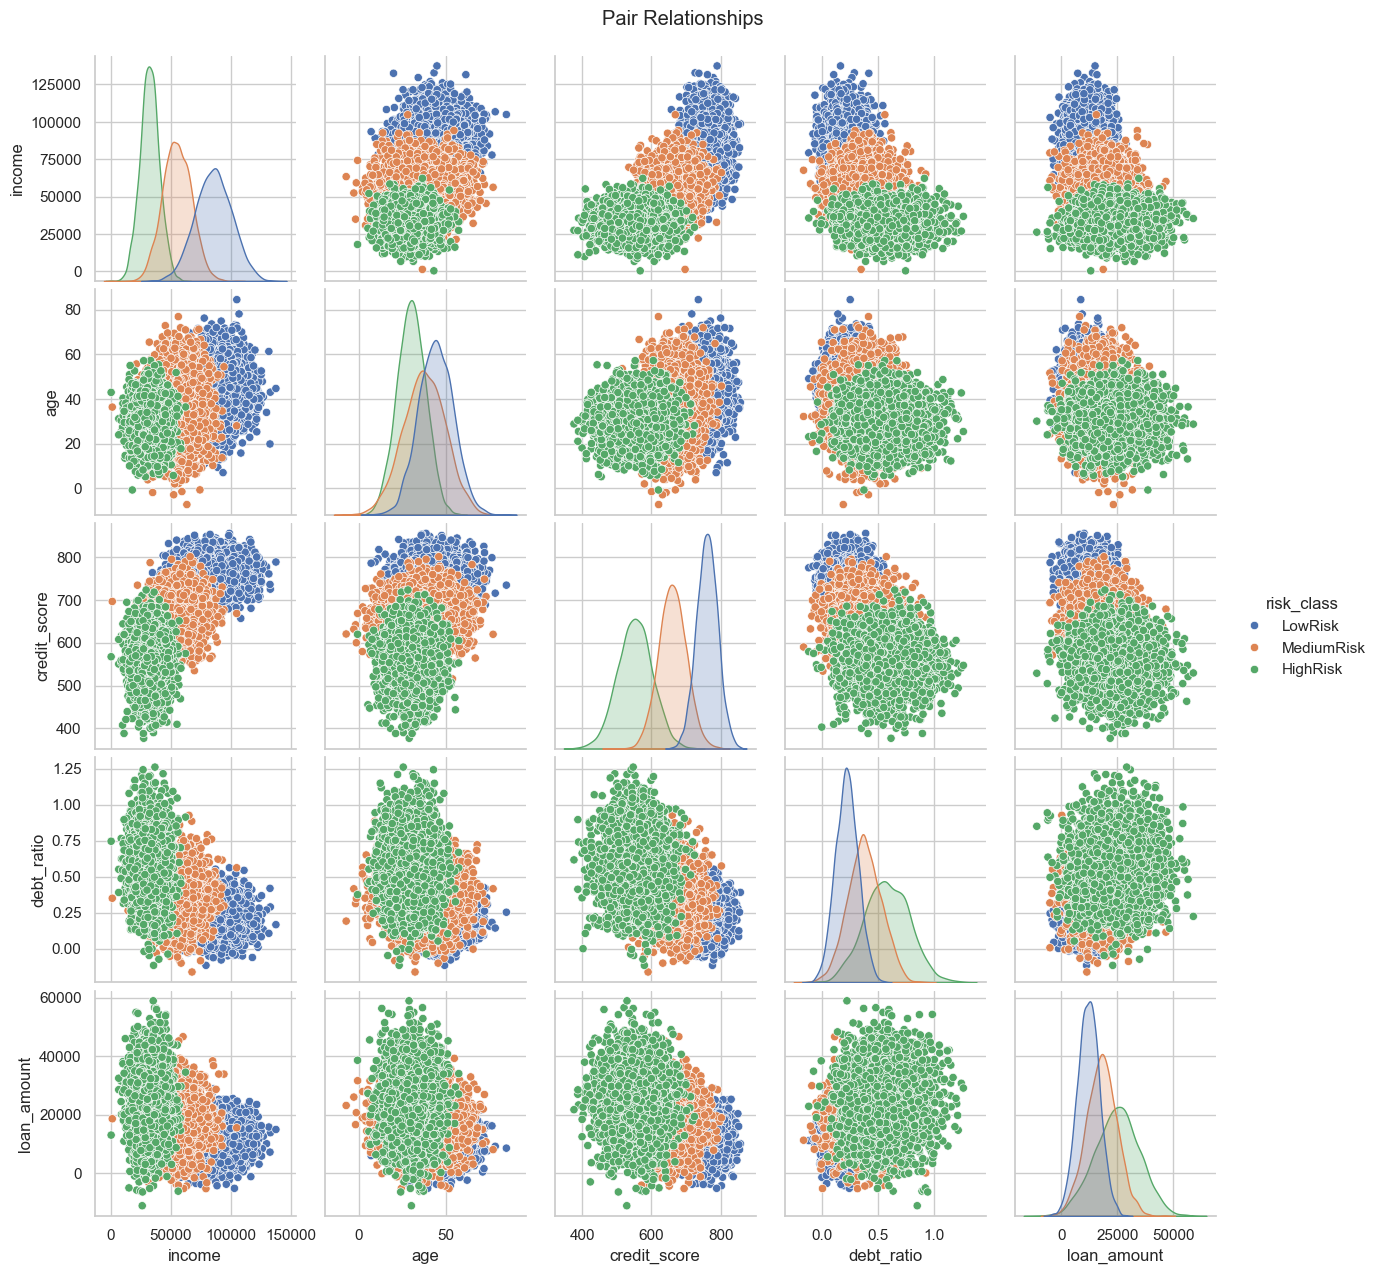

In [55]:
sns.pairplot(df, vars=numeric_features, hue='risk_class', diag_kind='kde')
plt.suptitle("Pair Relationships", y=1.02)
plt.show()

### Scatterplots

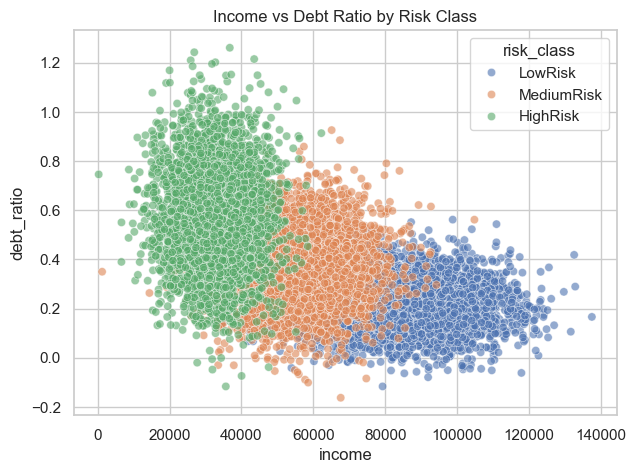

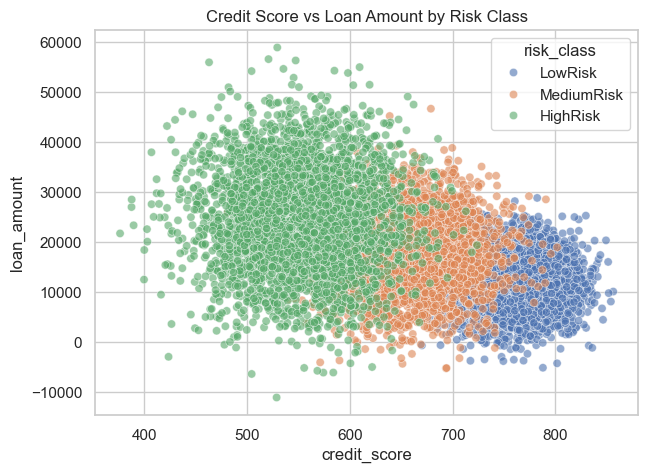

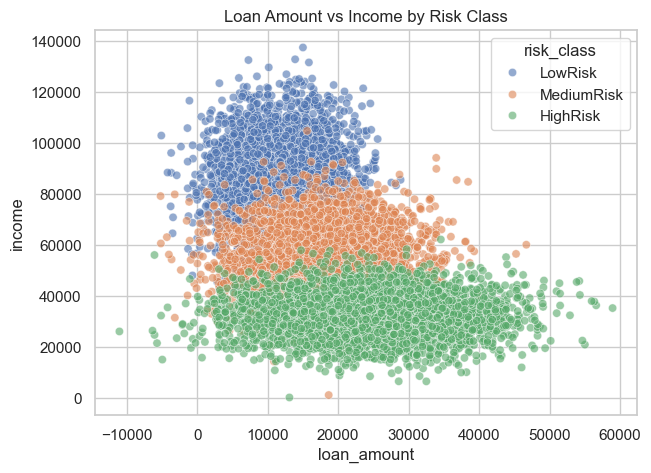

In [56]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='income',
    y='debt_ratio',
    hue='risk_class',
    alpha=0.6
)
plt.title("Income vs Debt Ratio by Risk Class")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='credit_score',
    y='loan_amount',
    hue='risk_class',
    alpha=0.6
)
plt.title("Credit Score vs Loan Amount by Risk Class")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='loan_amount',
    y='income',
    hue='risk_class',
    alpha=0.6
)
plt.title("Loan Amount vs Income by Risk Class")
plt.show()


### Interactive Scatterplots

In [57]:
fig = px.scatter(
    df,
    x=df.columns[0],
    y=df.columns[1],
    hover_data=df.columns,
    color='risk_class',
    color_continuous_scale='Viridis'
)
fig.show()


In [58]:
fig = px.scatter(
    df,
    x=df.columns[0],
    y=df.columns[4],
    hover_data=df.columns,
    color='risk_class',
    color_continuous_scale='Viridis'
)
fig.show()

### 3D version of Scatterplot

In [59]:
fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2], color='risk_class', color_discrete_sequence=['blue', 'orange', 'green'])
fig.show()

---
---
## P3. Modeling and Simulation

### Imports

In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### Encode labels with Train/Test split

In [61]:
# Set seed for reproducibility
RND = 42
np.random.seed(RND)

# Plot style
sns.set(style='whitegrid')

features = ['income', 'age', 'credit_score', 'debt_ratio', 'loan_amount']
target = 'risk_class'

le = LabelEncoder()
df['risk_label'] = le.fit_transform(df[target])

X = df[features].copy()
y = df['risk_label']

# we can modify the test size to experiment with different train-test splits
# test_size=0.30 has 1800 samples in test set (30% of 6000)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RND, stratify=y
)

# Feature Scaling !! important for models Logistic Regression and SVM !!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shapes:", X_train.shape, X_test.shape)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Shapes: (7350, 5) (3150, 5)
Label mapping: {'HighRisk': 0, 'LowRisk': 1, 'MediumRisk': 2}


### Logistic Regression

In [62]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### SVM

In [63]:
svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train_scaled, y_train)

SVC(probability=True)

### Random Forest Classifier

In [64]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### XGBoost classifier

In [65]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

---
---
## P4. Evaluation and Analysis

### Imports

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

### Model Colection and Preparation

In [67]:
models = {
    "Logistic Regression": lr,
    "SVM": svc,
    "Random Forest": rf,
    "XGBoost": xgb
}

evaluation_results = {}

for name, model in models.items():
    X_test_input = X_test_scaled if name in ["Logistic Regression", "SVM"] else X_test      # pick scaled or standard features from models
    
    y_pred = model.predict(X_test_input)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted"
    )

    evaluation_results[name] = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "pred": y_pred
    }

evaluation_results

{'Logistic Regression': {'accuracy': 0.9580952380952381,
  'precision': 0.9580142129066263,
  'recall': 0.9580952380952381,
  'f1': 0.9580322941234899,
  'pred': array([1, 2, 1, ..., 1, 1, 2])},
 'SVM': {'accuracy': 0.9622222222222222,
  'precision': 0.9621856995747998,
  'recall': 0.9622222222222222,
  'f1': 0.9622012215413861,
  'pred': array([1, 2, 1, ..., 1, 1, 2])},
 'Random Forest': {'accuracy': 0.9577777777777777,
  'precision': 0.9577080986076244,
  'recall': 0.9577777777777777,
  'f1': 0.9576893092484181,
  'pred': array([1, 2, 1, ..., 1, 1, 2])},
 'XGBoost': {'accuracy': 0.9587301587301588,
  'precision': 0.9587349894759163,
  'recall': 0.9587301587301588,
  'f1': 0.9587256350459414,
  'pred': array([1, 2, 1, ..., 1, 1, 2], dtype=int64)}}

### Function to display model performances


   MODEL: Logistic Regression
Accuracy: 0.9581
Precision: 0.9580
Recall: 0.9581
F1-score: 0.9580

              precision    recall  f1-score   support

    HighRisk       0.96      0.96      0.96      1050
     LowRisk       0.98      0.98      0.98      1050
  MediumRisk       0.94      0.93      0.94      1050

    accuracy                           0.96      3150
   macro avg       0.96      0.96      0.96      3150
weighted avg       0.96      0.96      0.96      3150



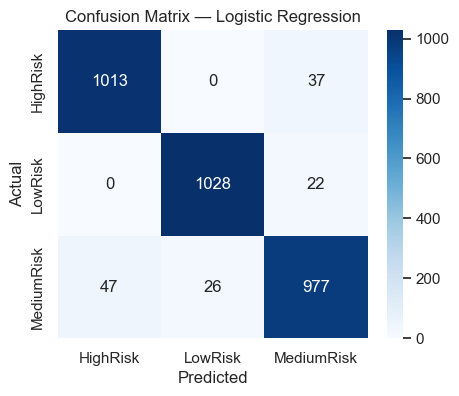


   MODEL: SVM
Accuracy: 0.9622
Precision: 0.9622
Recall: 0.9622
F1-score: 0.9622

              precision    recall  f1-score   support

    HighRisk       0.96      0.96      0.96      1050
     LowRisk       0.98      0.98      0.98      1050
  MediumRisk       0.95      0.94      0.94      1050

    accuracy                           0.96      3150
   macro avg       0.96      0.96      0.96      3150
weighted avg       0.96      0.96      0.96      3150



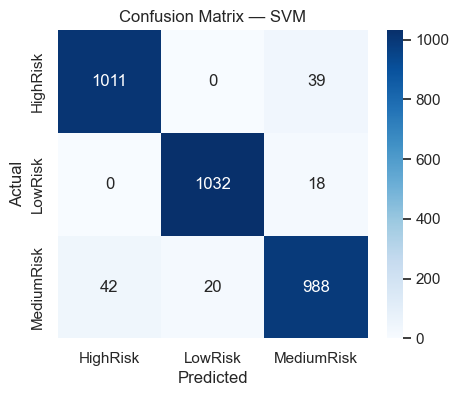


   MODEL: Random Forest
Accuracy: 0.9578
Precision: 0.9577
Recall: 0.9578
F1-score: 0.9577

              precision    recall  f1-score   support

    HighRisk       0.95      0.97      0.96      1050
     LowRisk       0.98      0.98      0.98      1050
  MediumRisk       0.95      0.93      0.94      1050

    accuracy                           0.96      3150
   macro avg       0.96      0.96      0.96      3150
weighted avg       0.96      0.96      0.96      3150



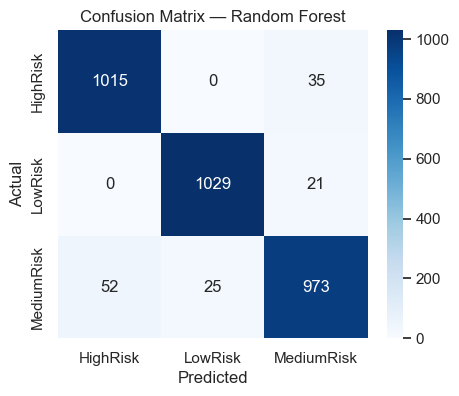


   MODEL: XGBoost
Accuracy: 0.9587
Precision: 0.9587
Recall: 0.9587
F1-score: 0.9587

              precision    recall  f1-score   support

    HighRisk       0.96      0.96      0.96      1050
     LowRisk       0.98      0.98      0.98      1050
  MediumRisk       0.94      0.94      0.94      1050

    accuracy                           0.96      3150
   macro avg       0.96      0.96      0.96      3150
weighted avg       0.96      0.96      0.96      3150



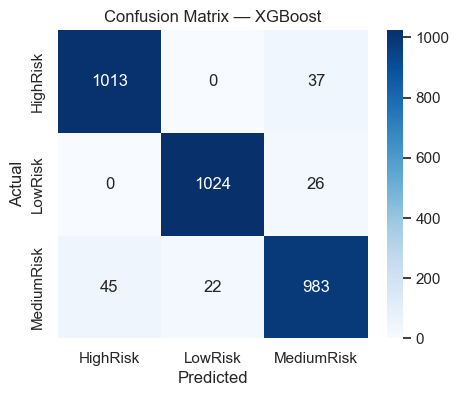

In [68]:
for name, stats in evaluation_results.items():
    print(f"\n==============================")
    print(f"   MODEL: {name}")
    print(f"==============================")
    print(f"Accuracy: {stats['accuracy']:.4f}")
    print(f"Precision: {stats['precision']:.4f}")
    print(f"Recall: {stats['recall']:.4f}")
    print(f"F1-score: {stats['f1']:.4f}\n")

    print(classification_report(y_test, stats["pred"], target_names=le.classes_))

    # confusion matrix heatmap
    cm = confusion_matrix(y_test, stats["pred"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Comparison Plot

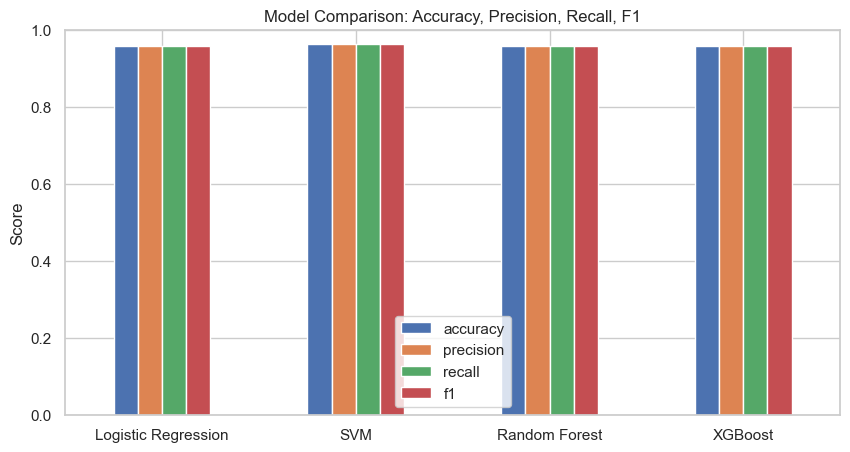

accuracy precision    recall        f1
Logistic Regression  0.958095  0.958014  0.958095  0.958032
SVM                  0.962222  0.962186  0.962222  0.962201
Random Forest        0.957778  0.957708  0.957778  0.957689
XGBoost               0.95873  0.958735   0.95873  0.958726

In [69]:
results_df = pd.DataFrame(evaluation_results).T
results_df = results_df[['accuracy', 'precision', 'recall', 'f1']]

results_df.plot.bar(figsize=(10,5), ylim=(0,1))
plt.title("Model Comparison: Accuracy, Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

results_df

---
---
### Model Selection
##### Since SVM has the highest values, SVM will be the fitted model for the comparison of the original data's known properties.

In [70]:
svm_model = SVC(kernel='rbf', random_state=RND)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

### Compare SVM predicted class to Synthetic data's true class

In [71]:
true_counts = y_test.value_counts(normalize=True)
pred_counts = pd.Series(y_pred).value_counts(normalize=True)

risk_comparison = pd.DataFrame({
    "True Proportion": true_counts,
    "Predicted Proportion": pred_counts,
    "Difference": pred_counts - true_counts
})
risk_comparison

True Proportion  Predicted Proportion  Difference
0         0.333333              0.334286    0.000952
1         0.333333              0.333968    0.000635
2         0.333333              0.331746   -0.001587

### Check if SVM matches the rules set for the synthetic data generation
##### Closer values mean the SVM shows the same pattern as original's data
##### Example: 
 - Low-risk > high income, low debt
 - High-risk > low income, high debt
 - Medium-risk > median incom, median debt

In [72]:
# Add predictions to a frame
temp = X_test.copy()
temp['true_label'] = y_test
temp['pred_label'] = y_pred

# Mean of each feature per predicted class
pred_feature_means = temp.groupby('pred_label')[features].mean()
true_feature_means = temp.groupby('true_label')[features].mean()

pred_feature_means, true_feature_means


(                  income        age  credit_score  debt_ratio   loan_amount
 pred_label                                                                 
 0           32374.901902  30.011198    552.659033    0.591225  24884.342860
 1           85153.465542  43.987101    760.953503    0.221002  12160.120507
 2           54510.846722  37.973809    658.396694    0.378206  18311.653152,
                   income        age  credit_score  debt_ratio   loan_amount
 true_label                                                                 
 0           32422.262023  30.090257    553.682845    0.591046  25026.244905
 1           84987.143651  44.045520    760.690350    0.221815  12137.388327
 2           54624.929829  37.825034    657.529274    0.377882  18199.545196)

### Visualize True vs Predicted Features

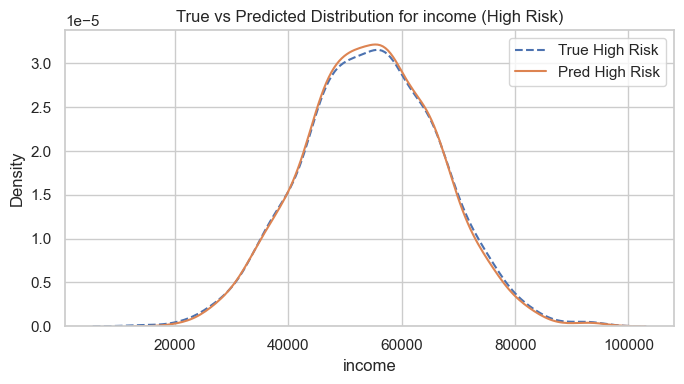

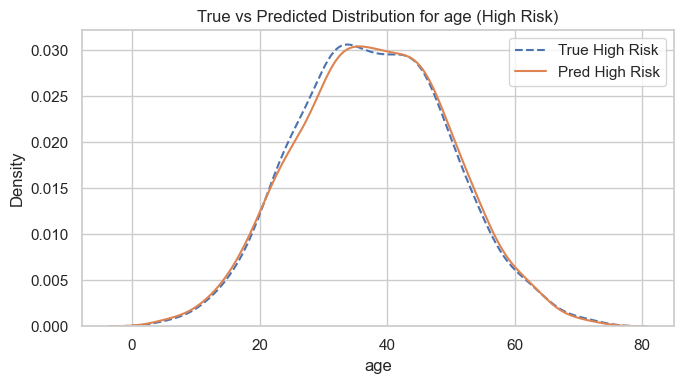

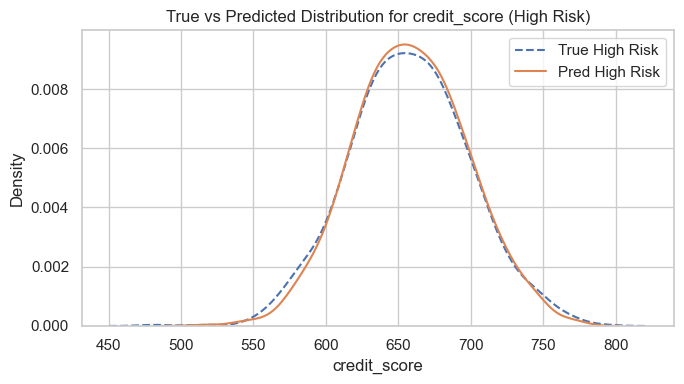

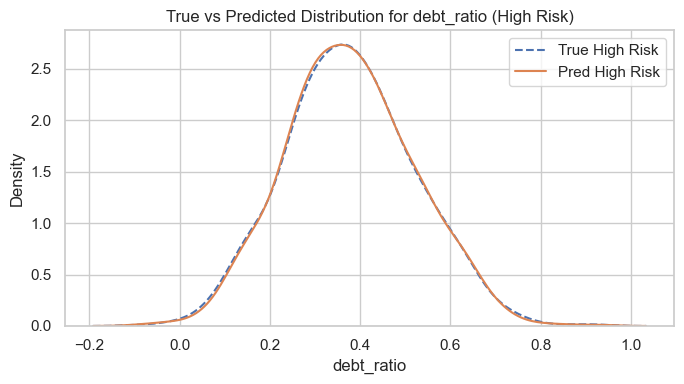

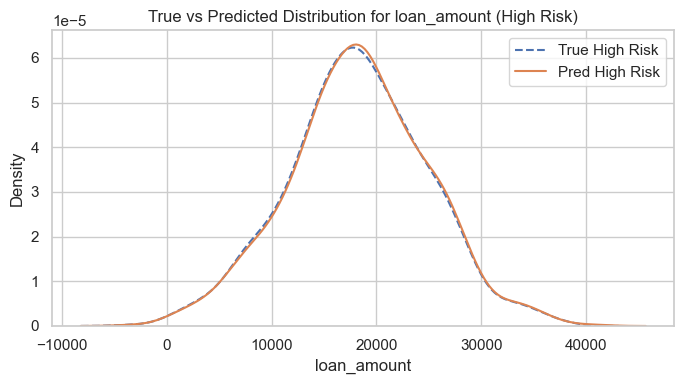

In [73]:
for col in features:
    plt.figure(figsize=(7,4))
    sns.kdeplot(temp[temp['true_label']==2][col], label="True High Risk", linestyle="--")
    sns.kdeplot(temp[temp['pred_label']==2][col], label="Pred High Risk")
    plt.title(f"True vs Predicted Distribution for {col} (High Risk)")
    plt.legend()
    plt.tight_layout()

## END
---
---